In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [2]:
from keras.datasets import mnist

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [280]:
n0 = 28*28
n1 = 16
n2 = 16
n3 = 10
W1 = np.random.randn(n0, n1)
b1 = np.random.randn(n1)
W2 = np.random.randn(n1, n2)
b2 = np.random.randn(n2)
W3 = np.random.randn(n2, n3)
b3 = np.random.randn(n3)

In [281]:
epoch = 10
batch_size = 50
learning_rate = 1

In [282]:
m = X_train.shape[0]
losses = []
for i in range(epoch):
    j = 0
    step = 0
    arr = np.arange(m)
    np.random.shuffle(arr)
    while j < m:
        arr_j = arr[j:j+batch_size]
        j_size = arr_j.size
        Z0 = X_train[arr_j].reshape(j_size, n0).astype(np.float64)
        y = y_train[arr_j]
        
        U1 = Z0 @ W1
        V1 = U1 + b1
        Z1 = V1.copy()
        Z1[Z1 < 0] = 0
        
        U2 = Z1 @ W2
        V2 = U2 + b2
        Z2 = V2.copy()
        Z2[Z2 < 0] = 0
        
        U3 = Z2 @ W3
        V3 = U3 + b3
        V3_max = V3.max(axis=1, keepdims=True)
        T3 = V3 - V3_max
        H3_exp = np.exp(T3)
        H3_exp_sum = H3_exp.sum(axis=1, keepdims=True)
        H3 = H3_exp / H3_exp_sum
        Z3 = np.log(H3_exp_sum) - T3
        L = Z3[range(j_size), y]
        
        l = L.sum()/j_size
        
        dT3 = H3
        dT3[range(j_size), y] -= 1
        dT3 = dT3/j_size
        dV3 = dT3
        db3 = dV3.sum(axis=0)
        dW3 = Z2.T @ dV3
        dZ2 = dV3 @ W3.T
        
        dV2 = dZ2 * (Z2 > 0)
        db2 = dV2.sum(axis=0)
        dW2 = Z1.T @ dV2
        dZ1 = dV2 @ W2.T
        
        dV1 = dZ1 * (Z1 > 0)
        db1 = dV1.sum(axis=0)
        dW1 = Z0.T @ dV1
        
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        
        j += batch_size
        step += 1
    test_size = X_test.shape[0]
    Z0 = X_test.reshape(test_size, n0)
    y = y_test
    
    U1 = Z0 @ W1
    V1 = U1 + b1
    Z1 = V1.copy()
    Z1[Z1 < 0] = 0

    U2 = Z1 @ W2
    V2 = U2 + b2
    Z2 = V2.copy()
    Z2[Z2 < 0] = 0

    U3 = Z2 @ W3
    V3 = U3 + b3
    V3_max = V3.max(axis=1, keepdims=True)
    T3 = V3 - V3_max
    H3_exp = np.exp(T3)
    H3_exp_sum = H3_exp.sum(axis=1, keepdims=True)
    H3 = H3_exp / H3_exp_sum
    Z3 = np.log(H3_exp_sum) - T3
    L = Z3[range(test_size), y]

    l = L.sum()/test_size
    
    acc = np.sum(pred == y)/test_size
    losses.append(l)
    print(f'epoch {i+1}: {l}; acc: {acc}')

epoch 1: 2.3134878164768713; acc: 0.098
epoch 2: 2.3047046617525093; acc: 0.098
epoch 3: 2.3074088863592848; acc: 0.098
epoch 4: 2.3055598197912737; acc: 0.098
epoch 5: 2.306018358408406; acc: 0.098
epoch 6: 2.3072460760063382; acc: 0.098
epoch 7: 2.3049968889649666; acc: 0.098
epoch 8: 2.3056923357408436; acc: 0.098
epoch 9: 2.305976139992221; acc: 0.098
epoch 10: 2.3060204613594197; acc: 0.098


1.6524370422430542e-05


(array([100.,  50., 100.,   0.,  50., 100.,   0.,  50.,   0.,  50.]),
 array([1.11812281e-06, 2.65874757e-06, 4.19937233e-06, 5.73999709e-06,
        7.28062186e-06, 8.82124662e-06, 1.03618714e-05, 1.19024961e-05,
        1.34431209e-05, 1.49837457e-05, 1.65243704e-05]),
 <a list of 10 Patch objects>)

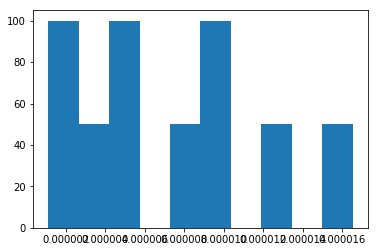

In [277]:
dx = 0.001
dF = dT3
dF_val = np.zeros_like(dF)
for i in np.ndindex(T3.shape):
    T3 = V3 - V3_max
    T3[i] += dx
    
    H3_exp = np.exp(T3)
    H3_exp_sum = H3_exp.sum(axis=1, keepdims=True)
    H3 = H3_exp / H3_exp_sum
    Z3 = np.log(H3_exp_sum) - T3
    L = Z3[range(j_size), y]
    
    l_new = L.sum()/j_size
    
    dl = (l_new - l)/dx
    dF_val[i] = dl
print(np.abs(dF-dF_val).max())
plt.hist(np.abs(dF-dF_val).flatten())

In [276]:
Z0 = X_train[arr_j].reshape(j_size, n0).astype(np.float64)
y = y_train[arr_j]

U1 = Z0 @ W1
V1 = U1 + b1
Z1 = V1.copy()
Z1[Z1 < 0] = 0

U2 = Z1 @ W2
V2 = U2 + b2
Z2 = V2.copy()
Z2[Z2 < 0] = 0

U3 = Z2 @ W3
V3 = U3 + b3
V3_max = V3.max(axis=1, keepdims=True)
T3 = V3 - V3_max
H3_exp = np.exp(T3)
H3_exp_sum = H3_exp.sum(axis=1, keepdims=True)
H3 = H3_exp / H3_exp_sum
Z3 = np.log(H3_exp_sum) - T3
L = Z3[range(j_size), y]

l = L.sum()/j_size

0.0


(array([    0.,     0.,     0.,     0.,     0., 12544.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

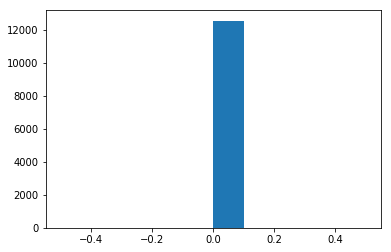

In [272]:
dx = 0.001
F = W1
dF = dW1
dF_val = np.zeros_like(dF)
for i in np.ndindex(F.shape):
    F_copy = F.copy()
    F_copy[i] += dx
    
    U1 = Z0 @ F_copy
    V1 = U1 + b1
    Z1 = V1.copy()
    Z1[Z1 < 0] = 0

    U2 = Z1 @ W2
    V2 = U2 + b2
    Z2 = V2.copy()
    Z2[Z2 < 0] = 0

    U3 = Z2 @ W3
    V3 = U3 + b3
    V3_max = V3.max(axis=1, keepdims=True)
    T3 = V3 - V3_max
    H3_exp = np.exp(T3)
    H3_exp_sum = H3_exp.sum(axis=1, keepdims=True)
    H3 = H3_exp / H3_exp_sum
    Z3 = np.log(H3_exp_sum) - T3
    L = Z3[range(j_size), y]
    
    l_new = L.sum()/j_size
    
    dl = (l_new - l)/dx
    dF_val[i] = dl
print(np.abs(dF-dF_val).max())
plt.hist(np.abs(dF-dF_val).flatten())

In [244]:
dF

array([[ 9.80588782e+02, -2.75045146e+02, -3.83287424e+01,
         6.49130088e+02,  3.77548403e+03,  0.00000000e+00,
        -8.68826604e+02,  1.04806164e+03,  6.36136788e+01,
         1.45351541e+03,  2.31634292e+03,  2.14801399e+01,
        -4.52167235e+02, -4.58769851e+02,  1.03467480e+03,
        -1.13790520e+01],
       [ 5.34741430e+02, -2.72494196e+02, -1.23588859e+02,
         2.92125593e+02,  2.62705587e+03,  0.00000000e+00,
        -2.87746946e+02,  7.54600870e+02, -6.24414406e+01,
         3.64345107e+02,  1.23182370e+03,  3.71473974e+01,
        -3.77775121e+02, -2.10600045e+02,  7.11716767e+02,
        -1.55678493e+01],
       [ 5.70935700e+02, -4.04994409e+02, -3.69744989e+02,
         5.97053871e+02,  2.90010542e+03,  2.71984224e+01,
        -4.47478339e+02,  6.81350829e+02,  8.31057716e+01,
         5.16483718e+02,  1.33859350e+03, -6.42688396e+00,
        -2.45811903e+02, -1.45215676e+02,  6.46552041e+02,
         1.41797019e+02],
       [ 8.93907988e+01, -1.60791408e

In [245]:
dF_val

array([[ 9.80588782e+02, -2.76479452e+02, -3.83287425e+01,
         6.49130088e+02,  3.77548403e+03,  0.00000000e+00,
        -8.68826604e+02,  1.04806164e+03,  6.36136788e+01,
         1.45351541e+03,  2.31634292e+03,  2.14801399e+01,
        -4.52167235e+02, -4.58769851e+02,  1.03467480e+03,
        -1.13790520e+01],
       [ 5.34741430e+02, -2.76056144e+02, -1.23588859e+02,
         2.92125593e+02,  2.62705587e+03,  0.00000000e+00,
        -2.87746946e+02,  7.54600870e+02, -6.24414406e+01,
         3.64345107e+02,  1.23182370e+03,  3.71473974e+01,
        -3.77775121e+02, -2.10600045e+02,  7.11716767e+02,
        -1.55678493e+01],
       [ 5.70935700e+02, -4.04994409e+02, -3.69744989e+02,
         5.97053871e+02,  2.90010542e+03,  2.71984224e+01,
        -4.47478339e+02,  6.81350829e+02,  8.31057716e+01,
         5.16483718e+02,  1.33859350e+03, -6.42688397e+00,
        -2.45811903e+02, -1.45215676e+02,  6.46552041e+02,
         1.41797019e+02],
       [ 8.93907987e+01, -1.60791408e